# Welcome! This is Antonio Cervantes and Christian Pedrigal's Machine Learning Final Project!

## Implementation of an Activity Detection System

#### Fall 2021 | Feruza Amirkulova ME 297-01 | Introduction to Optimization and Machine Learning |San Jose State University


#### Imports

In [3]:
import os
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.python.keras.optimizer_v2.adam import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Input

Data file should be in the format of

feature1, feature2, feature3,... featureN, activity_label

Features can be from any number of XYZ axes and from either or all sensors decided by engineers, but be sure to note which order they are placed in, and the order of the sensor type.

In [30]:
#datafile = read_csv(r'.\data\finalData20211204_v00.csv', header=0)
datafile = read_csv(r'.\data\rescaled_featureTable_20211205_v00.csv', header=0)
dataset = datafile.values

##### Visualize the Data

In [31]:
datafile

,AngFreqX,AngFreqY,AngFreqZ,AmpX,AmpY,AmpZ,MedJerkX,MedJerkY,MedJerkZ,LabelCol
0,2.344570,4.769465,3.453826,43.499893,29.784348,29.201104,36.246550,37.524702,38.218704,Bike
1,7.032146,14.292519,10.349982,6.386593,45.329783,2.792721,40.906822,40.193130,38.367857,Bike
2,7.032146,23.815572,3.453826,2.819911,52.104106,3.694607,48.761701,48.746860,48.556502,Bike
3,2.344570,23.815572,17.246137,2.151884,58.046007,2.368276,43.856071,43.128339,41.641957,Bike
4,4.688358,4.769465,3.453826,3.354227,50.679265,0.996908,39.248316,39.740246,39.716234,Bike
...,...,...,...,...,...,...,...,...,...,...
2477,11.161678,22.681875,16.425166,97.280707,31.785980,40.308343,53.185629,54.971847,52.154658,Walk
2478,11.719723,23.815572,17.246137,97.368660,31.141359,39.995816,42.071573,43.047521,42.430035,Walk
2479,11.719723,23.815572,17.246137,97.547687,32.242386,41.831902,49.061065,49.725893,49.762876,Walk
2480,11.719723,23.815572,17.246137,97.723831,31.206160,40.676614,53.100032,48.206290,47.133008,Walk


In [32]:
dataset[0]

array([2.34456979768618, 4.76946526101783, 3.45382634289858,
       43.4998928079735, 29.784347812298, 29.2011035366567,
       36.2465504361044, 37.5247020081432, 38.218703718847, 'Bike'],
      dtype=object)

In [65]:
feature_names = list(datafile.columns.values)

##### Parse the data and labels

In [66]:
data = dataset[:,0:9].astype(float)
labels = dataset[:,9]
labels

array(['Bike', 'Bike', 'Bike', ..., 'Walk', 'Walk', 'Walk'], dtype=object)

In [67]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)

In [68]:
# Rows
bike_rows = np.arange(0,357)
jumprope_rows = np.arange(358,741)
mtnclb_rows = np.arange(742,952)
run_rows = np.arange(953,1210)
squat_rows = np.arange(1211,1469)
stairs_rows = np.arange(1470,1561)
walk_rows = np.arange(1262,2450)

activity_rows = np.array([bike_rows,
                     jumprope_rows,
                     mtnclb_rows,
                     run_rows,
                     squat_rows,
                     stairs_rows,
                     walk_rows]
                     )

num_activities = activity_rows.shape[0] # Should return 7 classes



for j,_class in enumerate(activity_rows):
    print(j, _class)

#activity_rows[0]
bike_rows

label_str = ['Bike', 'Jumprope', 'MtnClb', 'Run', 'Squat', 'Stairs', 'Walk']
label_str[2]

activity_rows.size



0 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 

C:\Users\pedri\AppData\Local\Temp/ipykernel_18992/2800292078.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  activity_rows = np.array([bike_rows,


7

In [69]:
labels = datafile.columns
print(labels)
labels = labels.delete(9)
print(labels)

len(labels)

print(labels[0])

for i,label in enumerate(labels):
    print(i,label)
    

Index(['AngFreqX', 'AngFreqY', 'AngFreqZ', 'AmpX', 'AmpY', 'AmpZ', 'MedJerkX',
       'MedJerkY', 'MedJerkZ', 'LabelCol'],
      dtype='object')
Index(['AngFreqX', 'AngFreqY', 'AngFreqZ', 'AmpX', 'AmpY', 'AmpZ', 'MedJerkX',
       'MedJerkY', 'MedJerkZ'],
      dtype='object')
AngFreqX
0 AngFreqX
1 AngFreqY
2 AngFreqZ
3 AmpX
4 AmpY
5 AmpZ
6 MedJerkX
7 MedJerkY
8 MedJerkZ


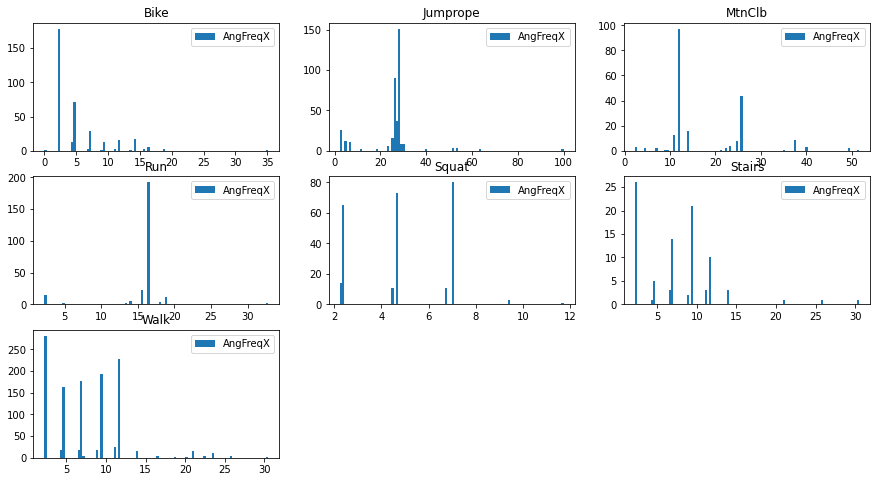

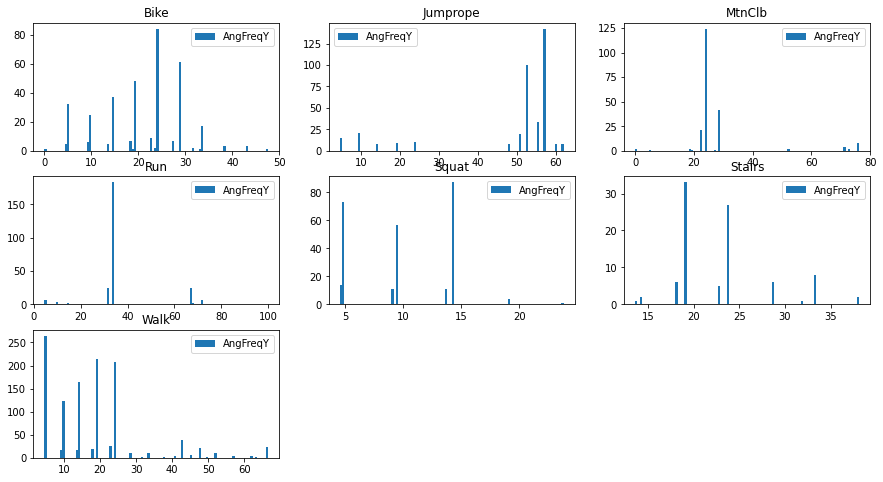

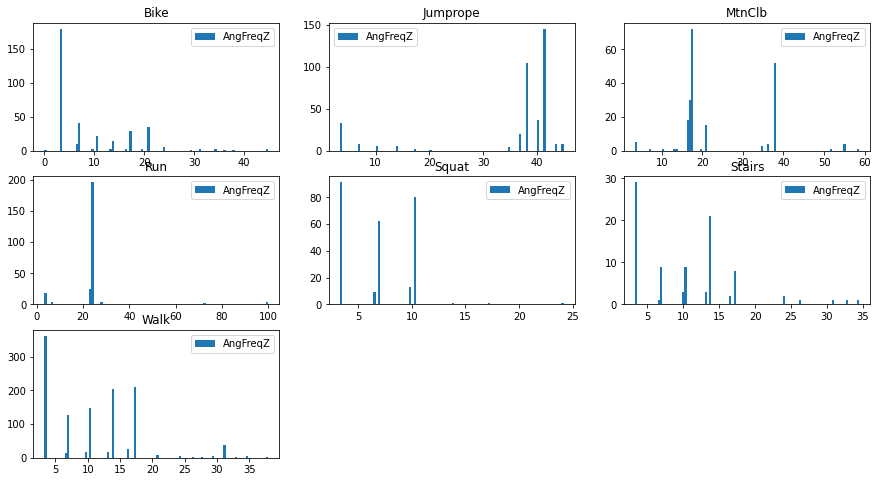

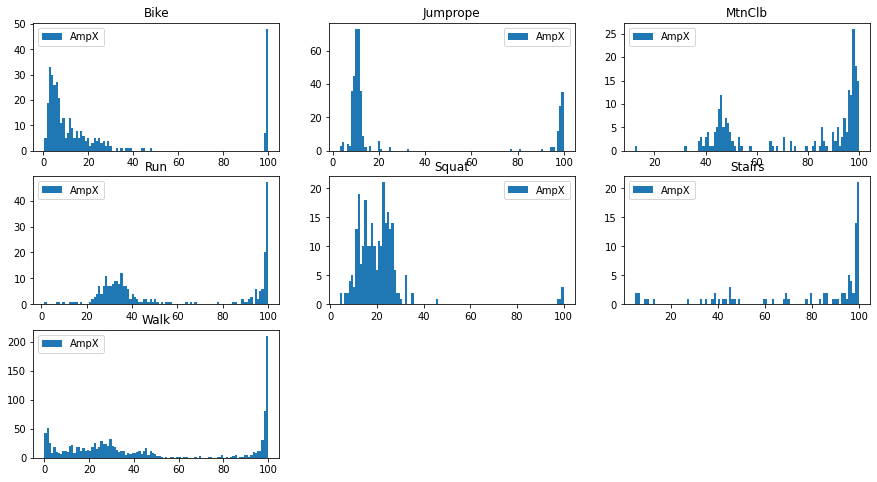

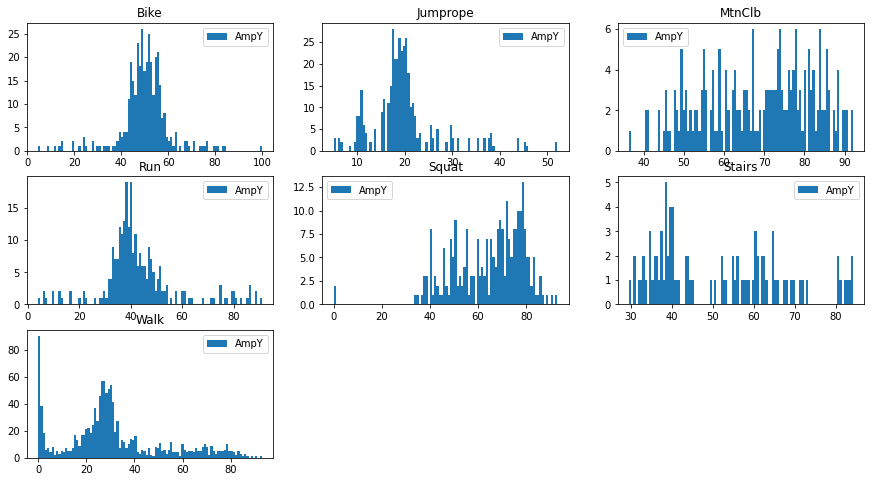

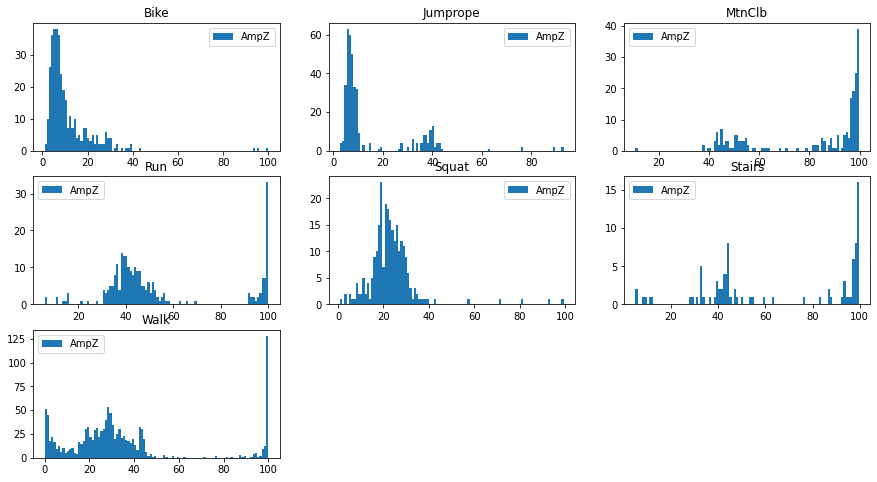

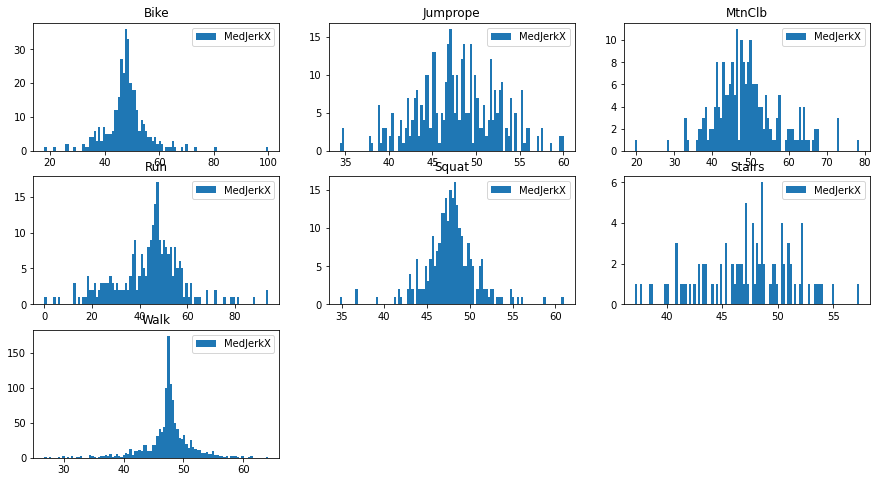

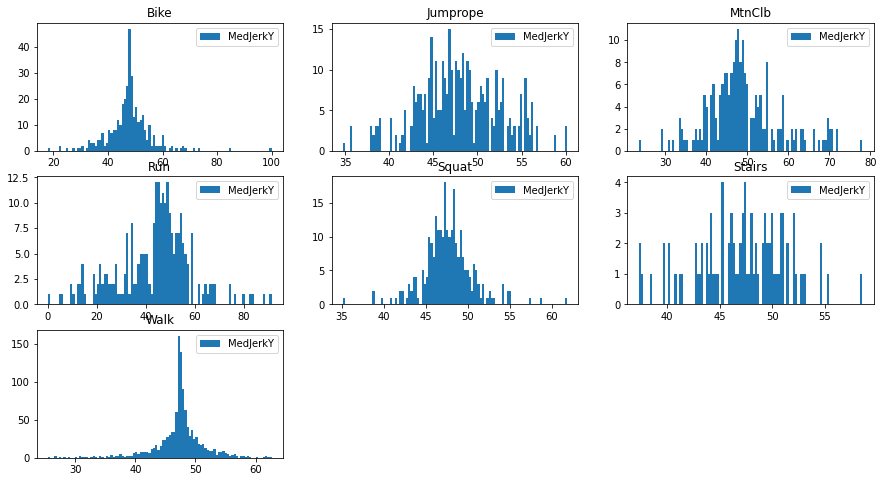

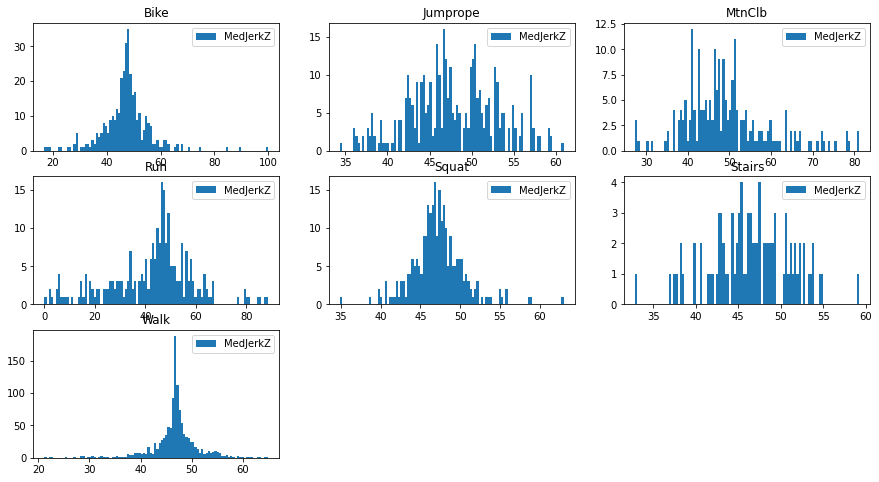

In [70]:
def plot_hist(np_obj, col: int, _label: str, _title: str) -> None:
    plt.hist(dataset[np_obj, col], 100, label= _label)
    plt.legend()
    plt.title(_title)


width = 15
height = 8
plt.rcParams['figure.figsize'] = [width, height]


for i,label in enumerate(labels):
    fig = plt.figure()
    for j, row in enumerate(activity_rows):
        fig = plt.subplot(3, 3, j+1)
        plot_hist(row, i, label, label_str[j])
plt.show()


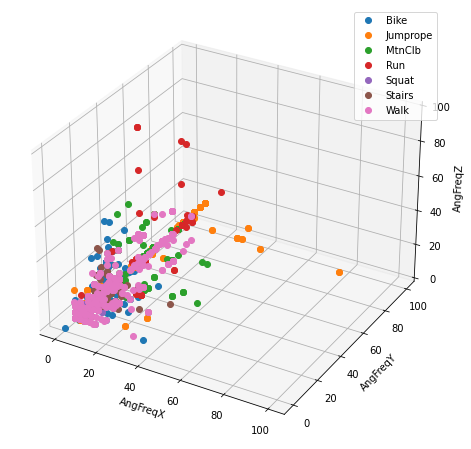

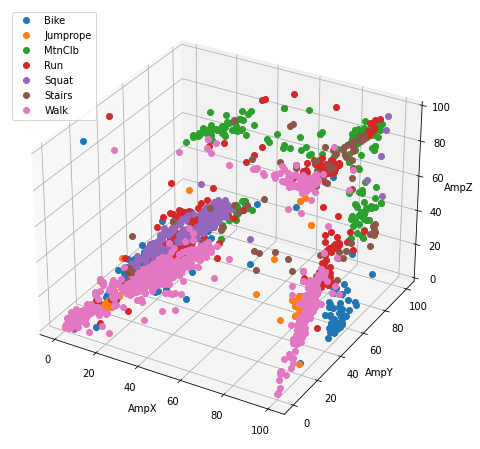

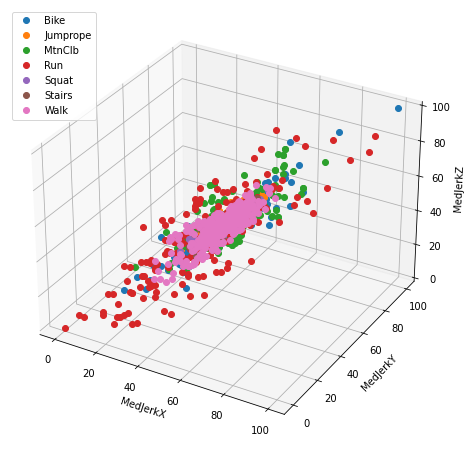

In [71]:
from mpl_toolkits import mplot3d
x = np.arange(1,len(labels)+1)

# Angle Frequency
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(dataset[bike_rows,0],dataset[bike_rows,1],dataset[bike_rows,2], linestyle='none', marker='o', label='Bike')
ax.plot3D(dataset[358:741,0],dataset[358:741,1],dataset[358:741,2], linestyle='none', marker='o', label='Jumprope')
ax.plot3D(dataset[742:952,0],dataset[742:952,1],dataset[742:952,2], linestyle='none', marker='o', label='MtnClb')
ax.plot3D(dataset[953:1210,0],dataset[953:1210,1],dataset[953:1210,2], linestyle='none', marker='o', label='Run')
ax.plot3D(dataset[1211:1469,0],dataset[1211:1469,1],dataset[1211:1469,2], linestyle='none', marker='o', label='Squat')
ax.plot3D(dataset[1470:1561,0],dataset[1470:1561,1],dataset[1470:1561,2], linestyle='none', marker='o', label='Stairs')
ax.plot3D(dataset[1562:2451,0],dataset[1562:2451,1],dataset[1562:2451,2], linestyle='none', marker='o', label='Walk')
plt.legend()
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2]);

# Amplitude
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(dataset[0:357,3],dataset[0:357,4],dataset[0:357,5], linestyle='none', marker='o', label='Bike')
ax.plot3D(dataset[358:741,3],dataset[358:741,4],dataset[358:741,5], linestyle='none', marker='o', label='Jumprope')
ax.plot3D(dataset[742:952,3],dataset[742:952,4],dataset[742:952,5], linestyle='none', marker='o', label='MtnClb')
ax.plot3D(dataset[953:1210,3],dataset[953:1210,4],dataset[953:1210,5], linestyle='none', marker='o', label='Run')
ax.plot3D(dataset[1211:1469,3],dataset[1211:1469,4],dataset[1211:1469,5], linestyle='none', marker='o', label='Squat')
ax.plot3D(dataset[1470:1561,3],dataset[1470:1561,4],dataset[1470:1561,5], linestyle='none', marker='o', label='Stairs')
ax.plot3D(dataset[1562:2451,3],dataset[1562:2451,4],dataset[1562:2451,5], linestyle='none', marker='o', label='Walk')
plt.legend()
ax.set_xlabel(feature_names[3])
ax.set_ylabel(feature_names[4])
ax.set_zlabel(feature_names[5]);

# Jerk
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(dataset[0:357,6],dataset[0:357,7],dataset[0:357,8], linestyle='none', marker='o', label='Bike')
ax.plot3D(dataset[358:741,6],dataset[358:741,7],dataset[358:741,8], linestyle='none', marker='o', label='Jumprope')
ax.plot3D(dataset[742:952,6],dataset[742:952,7],dataset[742:952,8], linestyle='none', marker='o', label='MtnClb')
ax.plot3D(dataset[953:1210,6],dataset[953:1210,7],dataset[953:1210,8], linestyle='none', marker='o', label='Run')
ax.plot3D(dataset[1211:1469,6],dataset[1211:1469,7],dataset[1211:1469,8], linestyle='none', marker='o', label='Squat')
ax.plot3D(dataset[1470:1561,6],dataset[1470:1561,7],dataset[1470:1561,8], linestyle='none', marker='o', label='Stairs')
ax.plot3D(dataset[1562:2451,6],dataset[1562:2451,7],dataset[1562:2451,8], linestyle='none', marker='o', label='Walk')
plt.legend()
ax.set_xlabel(feature_names[6])
ax.set_ylabel(feature_names[7])
ax.set_zlabel(feature_names[8]);

Debug

In [72]:
data.shape

(2482, 9)

In [73]:
labels.shape

(9,)

In [74]:
enumerate(labels)

In [75]:
encoded_labels.shape

(2482,)

# Learning

#### Method 1: Using model.fit

In [76]:
# Create the model      , input_shape=(2450,9)
"""
model = Sequential()
model.add(Dense(9, input_dim=1, activation='relu'))
#model.add(Dropout())
model.add(Dense(9, activation='softmax'))
model.summary()
"""


features = len(labels) # 9
classes = activity_rows.size # 7

# 3-Layer NN
model = Sequential()

# Input Layer
model.add(Dense(9, activation='relu', input_shape=(features,)))
model.add(Dropout(0.2))

# Hidden Layer #1
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='softmax')) 
model.summary()

"""  ValueError: Input 0 of layer sequential_9 is incompatible with the layer:
 expected axis -1 of input shape to have value 9 but received input with shape (None, 1)"""

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_26 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_40 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_27 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 10        
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


'  ValueError: Input 0 of layer sequential_9 is incompatible with the layer:\n expected axis -1 of input shape to have value 9 but received input with shape (None, 1)'

In [77]:
features = len(labels)
print(features)

classes = activity_rows.size
print(classes)

features = 9
classes  = 7

9
7


In [78]:
# Compile model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(),
              #optimizer=adam_v2.Adam(lr = 0.05),
              metrics=['accuracy'])

In [79]:
# Fit the model
model.fit(encoded_labels, data, validation_split=0.33, epochs=10, batch_size=50)

Epoch 1/10


ValueError: in user code:

    C:\Users\pedri\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\pedri\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\pedri\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\pedri\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\pedri\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\pedri\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\pedri\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\pedri\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\pedri\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_13 is incompatible with the layer: expected axis -1 of input shape to have value 9 but received input with shape (None, 1)


#### Method 2: Using KerasClassifier, KFold, and cross_val_score (in the next section)

In [80]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_labels = to_categorical(encoded_labels)

In [94]:
# define baseline model

def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(27, input_dim= features, activation='relu'))
	model.add(Dense(classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


"""
def baseline_model():
	model = Sequential()
	model.add(Dense(9, activation='relu', input_shape=(features,)))
	model.add(Dropout(0.2))
	model.add(Dense(9, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(classes, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
"""

"\ndef baseline_model():\n\tmodel = Sequential()\n\tmodel.add(Dense(9, activation='relu', input_shape=(features,)))\n\tmodel.add(Dropout(0.2))\n\tmodel.add(Dense(9, activation='relu'))\n\tmodel.add(Dropout(0.2))\n\tmodel.add(Dense(classes, activation='softmax'))\n\tmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\n\treturn model\n"

In [95]:
# Create Estimator
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=1, verbose=0)

Debug

In [96]:
dummy_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [97]:
dummy_labels.shape

(2482, 7)

# Evaluation

#### Evaluation for Method 2

In [98]:
kfold = KFold(n_splits=4, shuffle=True)

In [99]:
results = cross_val_score(estimator, data, dummy_labels, cv=kfold, error_score='raise')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 88.36% (0.67%)


# Debug
Run these cells only if you need to debug

Show NN input types and size

In [100]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 9) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
dense_39 (None, 9) float32
dropout_26 (None, 9) float32
dense_40 (None, 9) float32
dropout_27 (None, 9) float32
dense_41 (None, 9) float32


[None, None, None, None, None]